# Microscopic structure

We use the radial distribution function $g(r)$ as a way t understand the microscopic structure of a fluid. It is defined as the probability of finding another atom a distance $r$ away from the atom we are currently perusing.
We normalize the radial distribution function by dividing it with the average particle density $\rho$ such that $\lim_{r \to \infty} g(r) = 1$.

In [9]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [107]:
%%writefile scripts/rdf.in

# 3d Lennard-Jones gas
units lj
dimension 3
# Periodic boundiaries
boundary p p p
atom_style atomic

variable sigma equal 3.405
variable b equal 10
variable reduced_density equal 4/((${b}/${sigma})^3)


lattice fcc ${reduced_density}
region simbox block 0 10 0 10 0 10
create_box 1 simbox
create_atoms 1 box

mass 1 1.0
velocity all create ${T} 87287 dist uniform

variable cut equal 3.0
pair_style lj/cut ${cut}
pair_coeff 1 1 1.0 1.0

variable bins equal 50
compute myRDF all rdf ${bins}
fix 1 all ave/time 100 1 100 c_myRDF[*] file dat/rdf_${T}.log mode vector
fix 2 all nvt temp ${T} ${T} 1.0

#dump 1 all custom 10 ${dump_name} id type x y z vx vy vz
thermo 100
run 5000

Overwriting scripts/rdf.in


In [108]:
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp -var T 0.1 -in scripts/rdf.in
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp -var T 1.0 -in scripts/rdf.in
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp -var T 5.0 -in scripts/rdf.in
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp -var T 10.0 -in scripts/rdf.in
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp -var T 20.0 -in scripts/rdf.in

LAMMPS (4 Jan 2019)
  using 4 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 2.93686 2.93686 2.93686
Created orthogonal box = (0 0 0) to (29.3686 29.3686 29.3686)
  1 by 2 by 2 MPI processor grid
Created 4000 atoms
  Time spent = 0.00102082 secs
Neighbor list info ...
  update every 1 steps, delay 10 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 3.3
  ghost atom cutoff = 3.3
  binsize = 1.65, bins = 18 18 18
  2 neighbor lists, perpetual/occasional/extra = 1 1 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
  (2) compute rdf, occasional, copy from (1)
      attributes: half, newton on
      pair build: copy
      stencil: none
      bin: none
Setting up Verlet run ...
  Unit style    : lj
  Current step  : 0
  Time step     : 0.005
Per MPI rank memory allocation (min/avg/max) = 7.329 | 7.329 | 7.329 Mbytes
Step Temp

    1700    1.0067627   -1.3589807            0   0.15078576  0.058675101 
    1800    1.0025647   -1.3815133            0   0.12195771  0.061319011 
    1900   0.98970518   -1.3903205            0  0.093866105  0.059363651 
    2000    0.9842724   -1.4021242            0  0.073915316  0.064078819 
    2100   0.98930466   -1.4194984            0  0.064087627  0.051388736 
    2200   0.99810643   -1.4337624            0  0.063022967  0.069587478 
    2300   0.99496286   -1.4287893            0  0.063281893  0.067016999 
    2400   0.99180687   -1.4223794            0  0.064958939  0.051354014 
    2500   0.99847907   -1.4250957            0  0.072248506  0.059643808 
    2600    1.0122933   -1.4382186            0  0.079841741  0.047557968 
    2700     1.004269   -1.4235174            0  0.082509592  0.060446353 
    2800    1.0081575   -1.4312673            0  0.080590922  0.056956957 
    2900    1.0258668   -1.4632312            0  0.075184348  0.053784567 
    3000    1.0107215   -

    4800    5.0379212  -0.77597319            0    6.7790194   0.89970278 
    4900    5.0189441   -0.7515027            0    6.7750313   0.91476708 
    5000    4.9862394  -0.73173466            0    6.7457547   0.90015292 
Loop time of 2.59154 on 16 procs for 5000 steps with 4000 atoms

Performance: 833480.280 tau/day, 1929.353 timesteps/s
87.7% CPU use with 4 MPI tasks x 4 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 0.88474    | 0.96731    | 1.0394     |   5.6 | 37.33
Neigh   | 0.48229    | 0.52209    | 0.57111    |   4.5 | 20.15
Comm    | 0.73048    | 0.85333    | 0.97477    |   9.4 | 32.93
Output  | 0.004126   | 0.0045859  | 0.0049921  |   0.6 |  0.18
Modify  | 0.21124    | 0.2178     | 0.22088    |   0.8 |  8.40
Other   |            | 0.02644    |            |       |  1.02

Nlocal:    1000 ave 1029 max 958 min
Histogram: 1 0 0 0 0 1 0 0 1 1
Ngh

     100    19.878052  -0.06891485            0    29.740709    3.7705445 
     200    20.081816  -0.17796209            0    29.937231    3.7352881 
     300    20.187108 -0.029258641            0    30.243834    3.8755486 
     400    20.440914 -0.062959898            0    30.590746    3.8768892 
     500    20.515357  0.029696134            0    30.795039    3.9779174 
     600      20.4267  0.020506505            0    30.652897    3.9350914 
     700    20.026513 -0.081059266            0      29.9512    3.8040954 
     800    19.693149 -0.0056856278            0    29.526652    3.7947156 
     900    19.703435 -0.081190081            0    29.466574    3.7420272 
    1000    19.808607 -0.083925595            0    29.621556    3.7627091 
    1100     19.98393 -0.031676909            0    29.936725    3.8391836 
    1200    20.179194 -0.027528949            0    30.233695    3.8704796 
    1300    20.225237  0.047424055            0    30.377695    3.9439644 
    1400    20.273272  -

In [109]:
file_list = list(filter(lambda x: x.startswith("rdf"), os.listdir("dat")))

pattern = r"rdf_(.+).log"
temperature_list = [float(re.search(pattern, filename).group(1)) for filename in file_list]

file_list = list(map(lambda x: os.path.join("dat", x), file_list))

temperature_list, file_list = zip(*sorted(zip(temperature_list, file_list)))

In [110]:
g_r_dict = {}
bin_centers_dict = {}

for temp, filename in zip(temperature_list, file_list):
    n = 0
    key = None
    bin_centers = {}
    g_r = {}

    with open(filename, "r") as f:
        for line in f:
            if line.startswith("#"):
                continue

            line = line.split()
            if len(line) == 2:
                key = int(line[0])
                n = int(line[1])

                bin_centers[key] = []
                g_r[key] = []
                continue

            bin_centers[key].append(float(line[1]))
            g_r[key].append(float(line[2]))

    g_r_dict[temp] = g_r
    bin_centers_dict[temp] = bin_centers

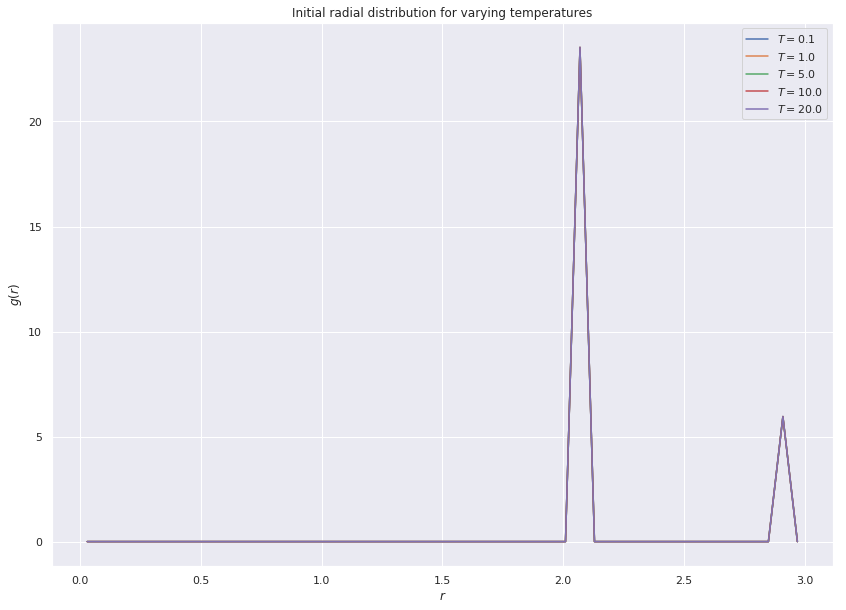

In [111]:
fig = plt.figure(figsize=(14, 10))

for i, temp in enumerate(temperature_list):
    key = min(g_r_dict[temp])

    plt.plot(
        bin_centers_dict[temp][key],
        g_r_dict[temp][key],
        label=fr"$T = {temp}$",
    )

plt.xlabel(r"$r$")
plt.ylabel(r"$g(r)$")
plt.legend(loc="best")
plt.title(r"Initial radial distribution for varying temperatures")
plt.show()

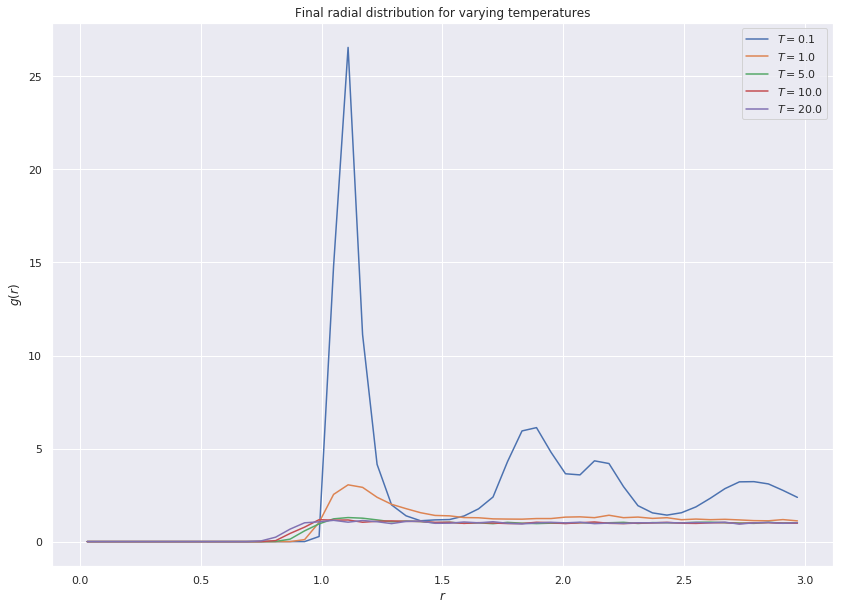

In [112]:
fig = plt.figure(figsize=(14, 10))

for i, temp in enumerate(temperature_list):
    key = max(g_r_dict[temp])

    plt.plot(
        bin_centers_dict[temp][key],
        g_r_dict[temp][key],
        label=fr"$T = {temp}$",
    )

plt.xlabel(r"$r$")
plt.ylabel(r"$g(r)$")
plt.legend(loc="best")
plt.title(r"Final radial distribution for varying temperatures")
plt.show()

In the two figures above we see how $g(r)$ changes for various temperatures both at the initial state and at the final time step. Not surprisingly, for the initial step, all temperatures yield the same crystal structure as this is forced by Lammps. It also tells us what the radial distribution function of a perfect crystal will look like. That is, it will be spikes arising from delta functions at the positions where the different atoms are situated in the crystal. When we let the system move around a bit we see how the radial distribution function changes for different temperatures. When $T$ is low we see that the crystal structure is almost preserved, i.e., the system is in a solid state. As the temperature increases the crystal melts and we get a smoother distribution function where the particles distribute more evenly and we see the expected trend with $\lim_{r \to \infty} g(r) = 1$. If we adjust the density to increase the pressure of the system we force the system to remain a solid and keep the crystal structure for higher temperatures. A lower density lets the system turn into a liquid faster.

In [113]:
def lennard_jones(r, sigma=1, epsilon=1):
    sigma_r = sigma / r
    return 4 * epsilon * (sigma_r ** 12  - sigma_r ** 6)

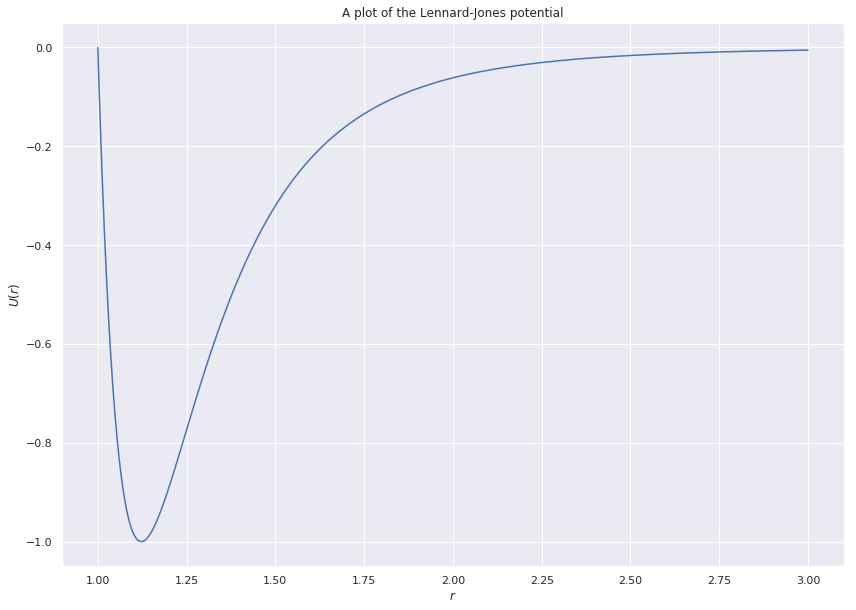

In [115]:
r = np.linspace(1, 3, 1001)
sigma = 1

fig = plt.figure(figsize=(14, 10))

plt.plot(r, lennard_jones(r, sigma=sigma))
plt.xlabel(r"$r$")
plt.ylabel(r"$U(r)$")
plt.title(r"A plot of the Lennard-Jones potential")
plt.show()

Looking at the plot of the Lennard-Jones potential we see that the most stable location is located at the bottom of the well around $r \approx 1.12$. If we compare this to the radial distribution function when the system is a liquid (in a low pressure system) we see that this corresponds to the "spike" where most of the atoms are located.